### 11403, 경로 찾기

**문제**
- 가중치 없는 방향 그래프 G가 주어졌을 때, 모든 정점 (i, j)에 대해서, i에서 j로 가는 경로가 있는지 없는지 구하는 프로그램을 작성하시오.

**입력**
- 첫째 줄에 정점의 개수 N (1 ≤ N ≤ 100)이 주어진다. 둘째 줄부터 N개 줄에는 그래프의 인접 행렬이 주어진다. i번째 줄의 j번째 숫자가 1인 경우에는 i에서 j로 가는 간선이 존재한다는 뜻이고, 0인 경우는 없다는 뜻이다. i번째 줄의 i번째 숫자는 항상 0이다.

**출력**
- 총 N개의 줄에 걸쳐서 문제의 정답을 인접행렬 형식으로 출력한다. 정점 i에서 j로 가는 경로가 있으면 i번째 줄의 j번째 숫자를 1로, 없으면 0으로 출력해야 한다.

**아이디어**

- 플로이드 워셜 알고리즘 활용
    - 경로 설정

In [16]:
N = int(input())

maps = list()

for _ in range(N):
    maps.append(list(map(int, input().split())))
    
    
# 플로이드 - 워셜 알고리즘
for k in range(N): # 경로 for 문
    for i in range(N):
        for j in range(N):
            if maps[i][j] == 1 or (maps[i][k] == 1 and maps[k][j] == 1 ): # 직접 오거나 경로를 거쳐서 올 수 있으면,
                maps[i][j] = 1
                
# 출력
for r in maps:
    for c in r:
        print(c, end = " ")
    print()

3
0 1 0
0 0 1
1 0 0
1 1 1 
1 1 1 
1 1 1 


### 18352, 특정 거리의 도시 찾기

**문제**
- 어떤 나라에는 1번부터 N번까지의 도시와 M개의 단방향 도로가 존재한다. 모든 도로의 거리는 1이다.

- 이 때 특정한 도시 X로부터 출발하여 도달할 수 있는 모든 도시 중에서, 최단 거리가 정확히 K인 모든 도시들의 번호를 출력하는 프로그램을 작성하시오. 또한 출발 도시 X에서 출발 도시 X로 가는 최단 거리는 항상 0이라고 가정한다.

- 예를 들어 N=4, K=2, X=1일 때 다음과 같이 그래프가 구성되어 있다고 가정하자.

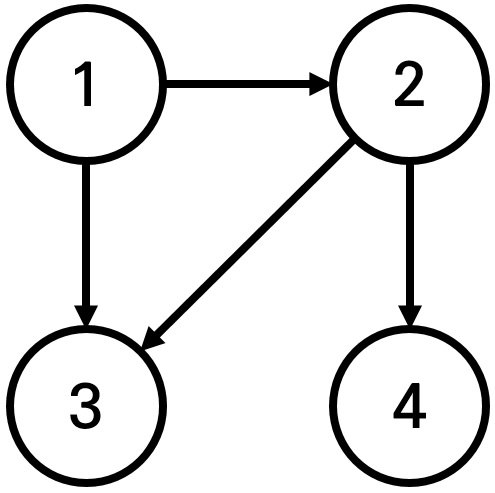

- 이 때 1번 도시에서 출발하여 도달할 수 있는 도시 중에서, 최단 거리가 2인 도시는 4번 도시 뿐이다.  2번과 3번 도시의 경우, 최단 거리가 1이기 때문에 출력하지 않는다.

**입력**
- 첫째 줄에 도시의 개수 N, 도로의 개수 M, 거리 정보 K, 출발 도시의 번호 X가 주어진다. (2 ≤ N ≤ 300,000, 1 ≤ M ≤ 1,000,000, 1 ≤ K ≤ 300,000, 1 ≤ X ≤ N) 둘째 줄부터 M개의 줄에 걸쳐서 두 개의 자연수 A, B가 공백을 기준으로 구분되어 주어진다. 이는 A번 도시에서 B번 도시로 이동하는 단방향 도로가 존재한다는 의미다. (1 ≤ A, B ≤ N) 단, A와 B는 서로 다른 자연수이다.

**출력**
- X로부터 출발하여 도달할 수 있는 도시 중에서, 최단 거리가 K인 모든 도시의 번호를 한 줄에 하나씩 오름차순으로 출력한다.

- 이 때 도달할 수 있는 도시 중에서, 최단 거리가 K인 도시가 하나도 존재하지 않으면 -1을 출력한다.

**아이디어**
- 너비 우선 탐색, 인접 리스트
- 방향이 있으므로 단 방향 만 추가

In [20]:
from collections import deque

N, M, K, X = map(int, input().split())

graph =  [[] for _ in range(N+1)]

for _ in range(M):
    src, dst = map(int, input().split())
    graph[src].append(dst)
    
answer = [-1] * (N+1) # 최단 거리 
answer[X] = 0

# dfs 알고리즘
que = deque([X]) # 초기화 

while que:
    now = que.popleft()
    for nxt in graph[now]: # now 에서 출발 하는 간선
        if answer[nxt] == -1: # 아직 방문 안했다면,
            answer[nxt] = answer[now] + 1 # 이전 노드 까지의 거리 + 1
            que.append(nxt)

# 결과 출력
for i in range(N+1):
    if answer[i] == K:
        print(i)
        
if K not in answer:
    print(-1)

4 4 2 1
1 2
1 3
2 3
2 4
4


### 1446, 지름길

**문제**
- 매일 아침, 세준이는 학교에 가기 위해서 차를 타고 D킬로미터 길이의 고속도로를 지난다. 이 고속도로는 심각하게 커브가 많아서 정말 운전하기도 힘들다. 어느 날, 세준이는 이 고속도로에 지름길이 존재한다는 것을 알게 되었다. 모든 지름길은 일방통행이고, 고속도로를 역주행할 수는 없다.

- 세준이가 운전해야 하는 거리의 최솟값을 출력하시오.

**입력**
- 첫째 줄에 지름길의 개수 N과 고속도로의 길이 D가 주어진다. N은 12 이하인 양의 정수이고, D는 10,000보다 작거나 같은 자연수이다. 다음 N개의 줄에 지름길의 시작 위치, 도착 위치, 지름길의 길이가 주어진다. 모든 위치와 길이는 10,000보다 작거나 같은 음이 아닌 정수이다. 지름길의 시작 위치는 도착 위치보다 작다.

**출력**
- 세준이가 운전해야하는 거리의 최솟값을 출력하시오.

**아이디어**
- 다익스트라 알고리즘 활용
    1. 최단 거리 테이블 생성 -> [i for i in range(d+1)] = [0,1,2,3,...,d]
    2. 한 칸 전 위치의 테이블 값 + 1 이 현재 테이블 값보다 작다면 현재 테이블 값을 한 칸 전 위치의 테이블 값 + 1로 바꾼다.
    3. 현재 위치에 지름길이 있다면, 지름길로 건너간 곳의 원래 테이블 값과 (지름길로 건너가기 전의 테이블 값 +지름길의 거리) 중 더 작은 값으로 건너간 곳의 값을 바꾼다.

In [48]:
n,d = map(int, input().split())

# 최단 거리 테이블
distance = [i for i in range(d+1)]

# 지름길 입력
arr = [list(map(int, input().split())) for _ in range(n)]

# 다익스트라 알고리즘 적용
for i in range(d+1):
    # 최단 거리 업데이트
    if i > 0:
        distance[i] = min(distance[i], distance[i-1] + 1)
    # 지름길에 따른 최단 거리 업데이트
    for src, dst, cost in arr:
        if i == src and dst <= d and distance[i]+cost < distance[dst]: # 지름길의 시작점 일치 and 종료 < 목적지 and 더 짧을 때
            distance[dst] = distance[src] + cost
            
print(distance[d])

8 900
0 10 9
20 60 45
80 190 100
50 70 15
160 180 14
140 160 14
420 901 5
450 900 0
432


### 9372, 상근이의 여행

**문제**
- 상근이는 겨울방학을 맞아 N개국을 여행하면서 자아를 찾기로 마음먹었다. 

- 하지만 상근이는 새로운 비행기를 무서워하기 때문에, 최대한 적은 종류의 비행기를 타고 국가들을 이동하려고 한다.

- 이번 방학 동안의 비행 스케줄이 주어졌을 때, 상근이가 **가장 적은 종류의 비행기**를 타고 모든 국가들을 여행할 수 있도록 도와주자.

- 상근이가 한 국가에서 다른 국가로 이동할 때 다른 국가를 거쳐 가도(심지어 이미 방문한 국가라도) 된다.

**입력**
- 첫 번째 줄에는 테스트 케이스의 수 T(T ≤ 100)가 주어지고,

- 각 테스트 케이스마다 다음과 같은 정보가 주어진다.
    - 첫 번째 줄에는 국가의 수 N(2 ≤ N ≤ 1 000)과 비행기의 종류 M(1 ≤ M ≤ 10 000) 가 주어진다.
    - 이후 M개의 줄에 a와 b 쌍들이 입력된다. a와 b를 **왕복하는 비행기**가 있다는 것을 의미한다. (1 ≤ a, b ≤ n; a ≠ b) 
    - 주어지는 비행 스케줄은 항상 연결 그래프를 이룬다.

**출력**
- 테스트 케이스마다 한 줄을 출력한다.

- 상근이가 모든 국가를 여행하기 위해 타야 하는 비행기 종류의 최소 개수를 출력한다.

**알고리즘**
- 그래프 이론, 트리

**아이디어**
- dfs, 인접 리스트를 활용

In [55]:
t = int(input())

def bfs(x):
    q = [x]
    visited[x] = 1
    cnt = 0
    while q:
        now = q.pop(0)
        for nx in graph[now]:
            if visited[nx] == 0:
                cnt += 1
                visited[nx] = 1
                q.append(nx)
                
    return cnt
        
for _ in range(t):
    ans = 0
    
    n, m = map(int, input().split())
    graph = [[] for _ in range(n+1)]
    for _ in range(m):
        a,b = map(int, input().split())
        graph[a].append(b)
        graph[b].append(a)
        
    # 방문 체크
    visited = [0]*(n+1)
    
    for i in range(n+1):
        if visited[i] == 0:
            ans += bfs(i)
    
    print(ans)
    

2
3 3
1 2
2 3
1 3
2
5 4
2 1
2 3
4 3
4 5
4
